Working with Image Data in Python


In [2]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')

In [3]:
#import images
leaf_images = glob('input2/*.jpg')

In [4]:
img_mpl = plt.imread('input2.jpg')
img_cv2 = cv2.imread('input2.jpg')
img_mpl.shape, img_cv2.shape

((4000, 6000, 3), (4000, 6000, 3))

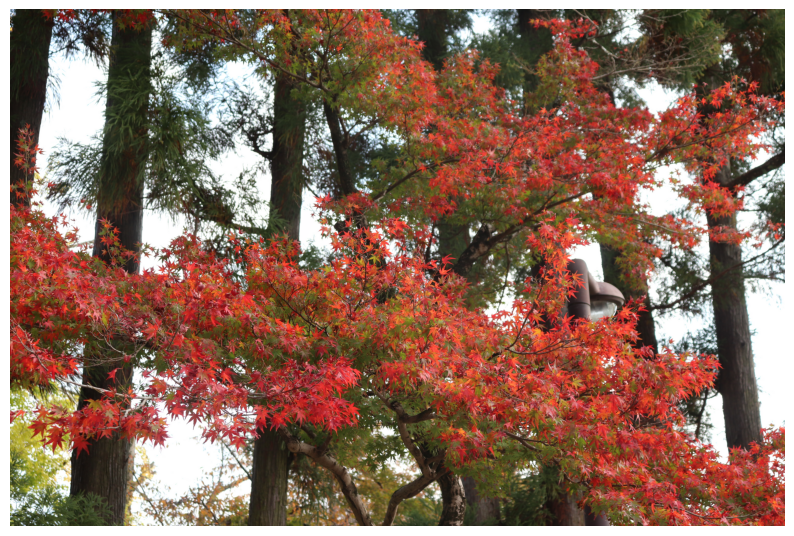

In [5]:
#display image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

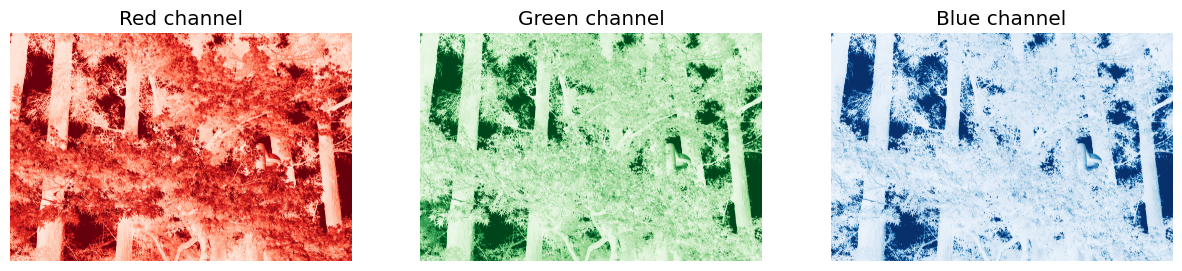

In [6]:
# Display RGB Channels of our image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

In [7]:
#blur
img_blur = cv2.GaussianBlur(img_mpl, (15, 15), cv2.BORDER_DEFAULT)
img_blur


array([[[170, 185, 203],
        [170, 184, 203],
        [170, 183, 202],
        ...,
        [ 52,  62,  29],
        [ 52,  62,  29],
        [ 51,  62,  29]],

       [[169, 184, 202],
        [169, 184, 202],
        [169, 182, 200],
        ...,
        [ 51,  62,  29],
        [ 51,  62,  29],
        [ 51,  62,  29]],

       [[166, 182, 199],
        [166, 182, 199],
        [166, 181, 198],
        ...,
        [ 51,  61,  29],
        [ 51,  61,  29],
        [ 51,  61,  29]],

       ...,

       [[ 56,  58,  22],
        [ 57,  59,  23],
        [ 59,  60,  24],
        ...,
        [206,  59,  47],
        [209,  58,  47],
        [210,  58,  47]],

       [[ 56,  57,  22],
        [ 56,  58,  22],
        [ 58,  60,  23],
        ...,
        [205,  59,  47],
        [208,  58,  47],
        [209,  58,  47]],

       [[ 56,  57,  21],
        [ 56,  58,  22],
        [ 58,  60,  23],
        ...,
        [205,  59,  47],
        [208,  58,  47],
        [209,  58,  47]]

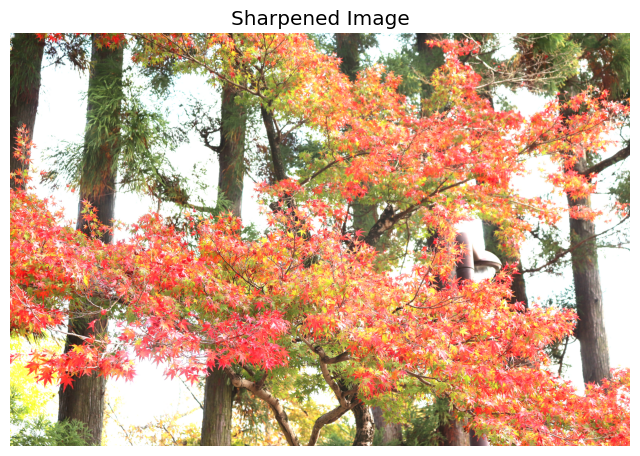

In [26]:
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,10,-1], 
                              [-1,-1,-1]])

sharpened = cv2.filter2D(img_mpl, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

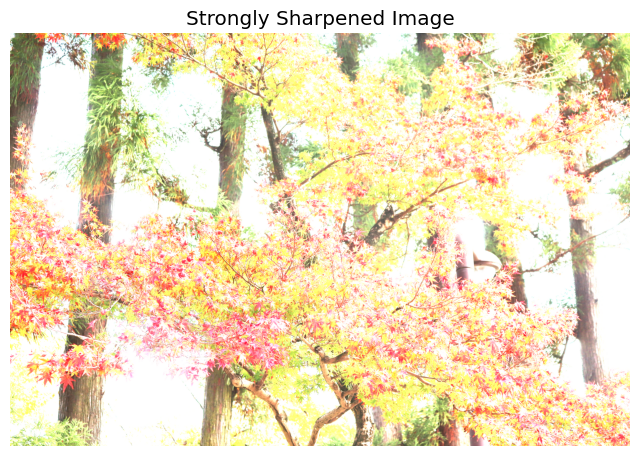

In [ ]:
# Load image with Matplotlib
img_mpl = plt.imread('input2.jpg')

# Convert float images (from plt.imread) to uint8 if necessary
if img_mpl.dtype == np.float32 or img_mpl.dtype == np.float64:
    img_mpl = (img_mpl * 255).astype(np.uint8)

# Convert RGB (Matplotlib) to BGR (OpenCV)
img_bgr = cv2.cvtColor(img_mpl, cv2.COLOR_RGB2BGR)

# Strong sharpening kernel
kernel_strong_sharpening = np.array([[-1, -1, -1], 
                                     [-1, 12, -1], 
                                     [-1, -1, -1]])
# Apply sharpening filter
sharpened_bgr = cv2.filter2D(img_bgr, -1, kernel_strong_sharpening)

# Convert back BGR to RGB for Matplotlib display
sharpened_rgb = cv2.cvtColor(sharpened_bgr, cv2.COLOR_BGR2RGB)

# Display the sharpened image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened_rgb)
ax.axis('off')
ax.set_title('Strongly Sharpened Image')
plt.show()